<a target="_blank" href="https://colab.research.google.com/github/trendinafrica/Comp_Neuro-ML_course/blob/main/notebooks/12-Monday/Python_colab.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<img align="left" width="300" src="https://raw.githubusercontent.com/trendinafrica/TReND-CaMinA/main/images/CaMinA_logo.png">

# TReND-CaMinA Day 1: Data Exploration and Visualization

**Content creators:** Artemis Koumoundourou

**Acknowledgements:** This notebook includes modified parts/was inspired from:
  - previous TReND Python and TReND-CaMinA courses
  - "Python for Data Analysis, 3rd Edition" by **Wes McKinney**

##**Learning objectives:**
* Getting a sense of some basic data exploration
* Using the Python package matplotlib to create visual representations of the data

## **Content**


1. [Data exploration](#stats)
    - 1.1 [Data types](#types)
    - 1.2 [Measures of central tendency](#tend)
    - 1.3 [Measures of dispersion](#disp)
    - 1.6 [Distribution types](#dist)


2. [Plotting data](#plot)
    - 2.1 [Figures and Subplots](#fig)
    - 2.2 [Colors, Markers, and Line Styles](#col)
    - 2.3 [Ticks, Labels, and Legends](#ticks)
    - 2.4 [Annotations and Drawing on a Subplot](#annot)
    - 2.5 [Saving Plots to File](#save)


3. [Self Study - Pandas](#self)
    
    

---

<a name="stats"></a>

## **1. Data exploration**

Statistics is a way of thinking about data that are variable. It enables us to analyze and interpret our study data and to critically interpret published literature. Statistics can neither prove nor disprove anything. <br>
**It is just a tool.**

---

<a name="types"></a>

## **1.1 Data types**


The types of data play a crucial role in machine learning. Different types of data require different preprocessing techniques, feature engineering methods, models and evaluation method. Understanding the types of data and their implications ensures that appropriate methods are used throughout the machine learning pipeline, leading to more accurate and robust models.

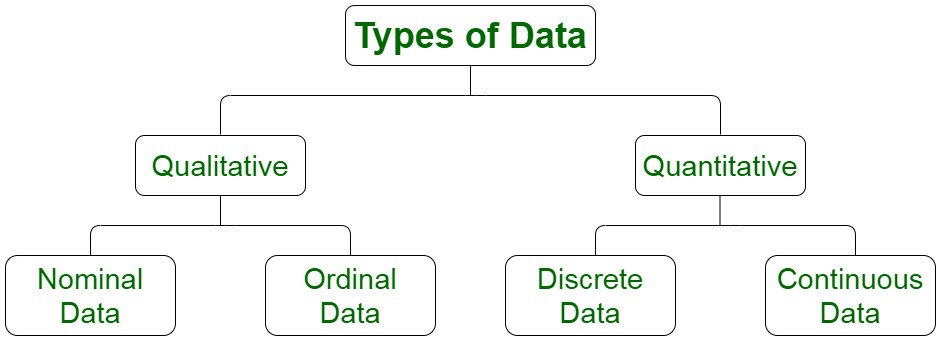

Source: https://www.geeksforgeeks.org/explain-different-types-of-data-in-statistics/

Time series, text, audio, image data...

---

<a name="tend"></a>

## **1.2 Measures of central tendency**

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. Mean, median, and mode are the three measures of central tendencies.

**Mean :** the sum of all measurements divided by the number of observations in the data set.


**Median :** the middle value that separates the higher half from the lower half of the data set.


**Mode :** the most frequent value in the data set.

**Why do we care about measures of central tendency?**

Measures of central tendency are fundamental in summarizing the data, guiding preprocessing steps, informing model choices, and providing insights into the data's underlying structure. Understanding these measures helps in building more robust and accurate machine learning models.

In [42]:
#@title Run this for dataset generation.
import numpy as np
data= np.random.lognormal(mean=1, sigma=0.2, size=1000)

Now let's exploring our data. We can start be visualizing the **histogram**.
A histogram is a graphical representation of the distribution of a dataset. It is an essential tool in data science for summarizing and visualizing the underlying frequency distribution of a continuous or discrete variable.


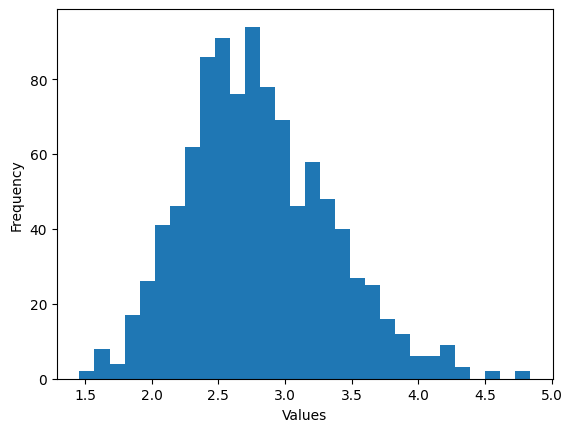

In [43]:
#@title Run this to visualize the histogram.
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data, bins=30)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

Let's calculate the mean, median and mode for our data.

In [44]:
import numpy as np
import statistics as st

mean=np.mean(data) #Calculate mean
median=np.median(data) #Calculate median
mode = st.mode(data) #Calculate mode

print("The mean is", mean)
print("The median is", median)
print("The mode is", mode)

#Alternatively
#from scipy import stats
#mode = stats.mode(data)

The mean is 2.7967714429664685
The median is 2.7400613564288183
The mode is 2.841015271506318


Let's overlay the three measures of central tendency on our histogram. What do you observe?

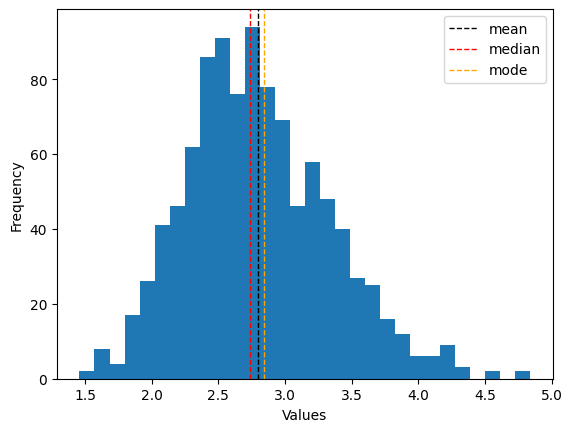

In [45]:
#@title Run this to overlay the measures of central tendency on the histogram.
plt.hist(data, bins=30)

plt.axvline(mean, color='k', linestyle='dashed', linewidth=1, label='mean')
plt.axvline(median,color='r',linestyle='dashed', linewidth=1, label='median')
plt.axvline(mode,color='orange',linestyle='dashed', linewidth=1, label='mode')
plt.legend()
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

- The median and the mode are the only measures of central tendency that can be used for ordinal data, in which values are ranked relative to each other but are not measured absolutely.

- The mode is the only central tendency measure that can be used with nominal data, which have purely qualitative category assignments.

- The median is less powerful and less sensitive to outliers as compared to the mean.

- Median and mode are commonly used to impute missing values, reducing the risk of introducing bias.

- For a certain distribution, there exists a situation where mean=median=mode




---

<a name="disp"></a>

## **1.3 Measures of dispersion**

The measures of central tendency are not adequate to describe data. Two data sets can have the same mean but they can be entirely different. Thus to describe data, one needs to know the extent of variability. This is given by the measures of dispersion. Range, interquartile range, and standard deviation are the three commonly used measures of dispersion.

**Range :** the difference between the largest and the smallest observation in the data.

**Interquartile range :** the difference between the 25th and 75th percentile (also called the first and third quartile). Hence the interquartile range describes the middle 50% of observations.

**Standard deviation :** the most commonly used measure of dispersion. It is a measure of spread of data about the mean. SD is the square root of sum of squared deviation from the mean divided by the number of observations.

**Why do we care about measures of dispersion?**

Measures of dispersion are fundamental for understanding the spread and variability in a dataset. Like the measures of central tendency, they play a critical role in preprocessing, feature engineering, and model evaluation, ultimately contributing to the development of more robust and accurate machine learning models.

Let's calculate the three measures of dispersion for our data.

In [46]:
range_data= max(data)-min(data) #Calculate range

import numpy as np

q3=np.percentile(data,[75])
q1=np.percentile(data,[25])
iqr=q3-q1 #Calculate interquartile range

std=np.std(data) #Calculate standard deviation

print("The range is", range_data)
print("The interquartile range is",iqr)
print("The standard deviation is",std)


The range is 3.3823260875618186
The interquartile range is [0.73779149]
The standard deviation is 0.5402614611258398


---

<a name="dist"></a>

## **1.4 Types of distribution**

In probability theory and statistics, a probability distribution is the mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment. It is a mathematical description of a random phenomenon in terms of its sample space and the probabilities of events.

**Why do we care about the data distribution?**

- Understanding the data distribution helps in selecting the most appropriate model, leading to better performance and more accurate predictions.

- Many machine learning algorithms require data to be normalized or scaled. Knowing the distribution helps in applying the correct transformation.

- Some algorithms assume that the residuals (errors) are normally distributed. Verifying these assumptions is essential for the validity of the model.


**Understanding and considering data distribution is vital for building robust, accurate, and generalizable machine learning models.**

### **Gaussian /normal distribution**

If data is symmetrically distributed on both sides of mean and form a bell-shaped curve in frequency distribution plot, the distribution of data is called normal or Gaussian. The normal curve describes the ideal distribution of continuous values. Whether our data is normally distributed or not, can be easily checked by applying a distribution test.

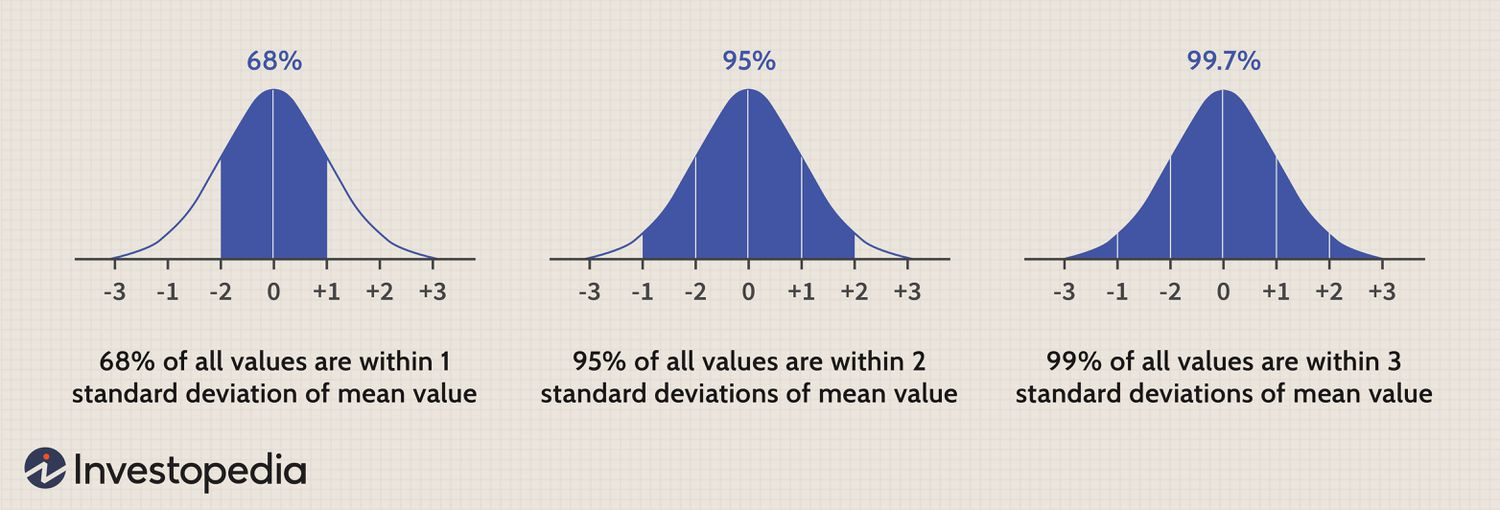

Source: https://www.investopedia.com/terms/n/normaldistribution.asp

### **Non-Gaussian (non-normal) distribution**

If the data is skewed on one side, then the distribution is non-normal.

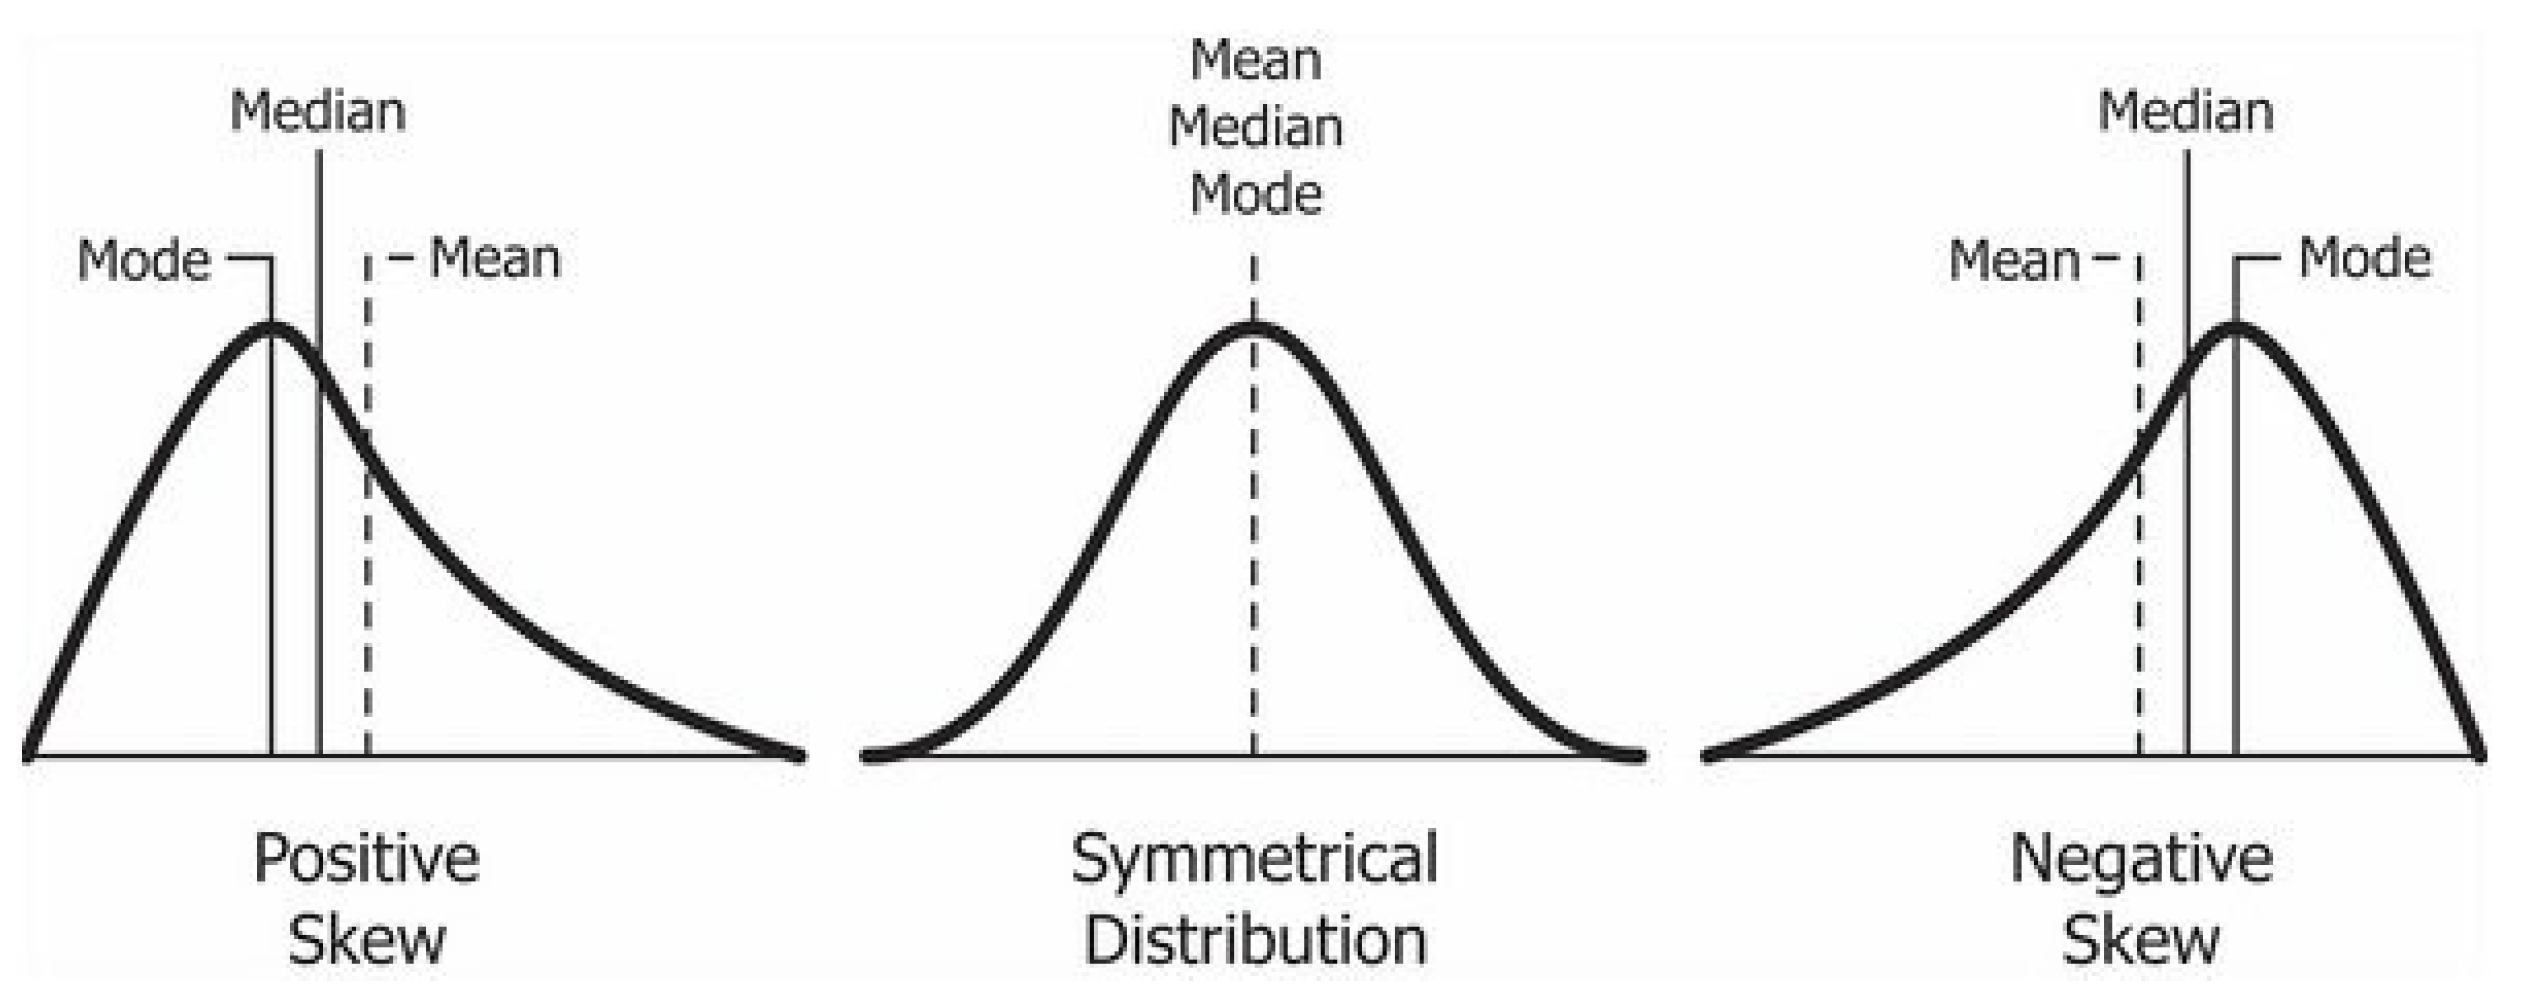

Source:https://www.mdpi.com/2227-9717/7/11/833/htm

How do you describe the distribution of the values in our data?
Let's have a look at the histogram again

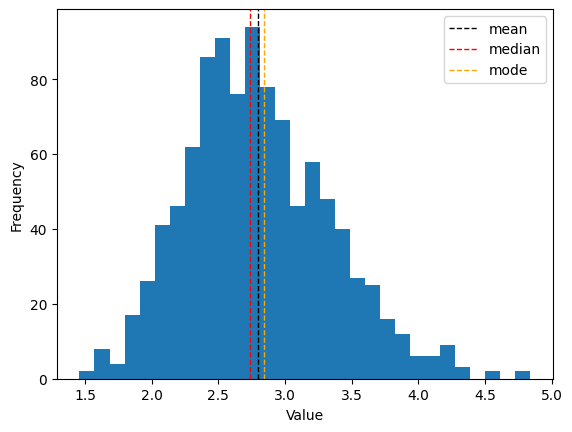

In [47]:
#@title Run this code to plot the histogram again.
plt.hist(data,bins=30)


mean=st.mean(data)
median=st.median(data)
mode=st.mode(data)

plt.axvline(mean, color='k', linestyle='dashed', linewidth=1, label='mean')
plt.axvline(median,color='r',linestyle='dashed', linewidth=1, label='median')
plt.axvline(mode,color='orange',linestyle='dashed', linewidth=1, label='mode')
plt.legend()

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

**How can we access normality?**

Various statistical tests and visualization techniques can be used to assess normality. Here are some common methods to test for normality:

**Visualization:**

- Histogram: Visual inspection using a histogram.
- Q-Q Plot: A quantile-quantile plot to compare the distribution of the data with a normal distribution.

**Statistical Tests:**

- Shapiro-Wilk Test: A statistical test specifically designed to test for normality.
- Kolmogorov-Smirnov Test: Another test for normality.
- Anderson-Darling Test: A test that provides critical values for normality.

**Visualization:** If the data is normally distributed, the histogram should resemble the bell curve, and the points in the Q-Q plot should lie on the line 𝑦=𝑥.

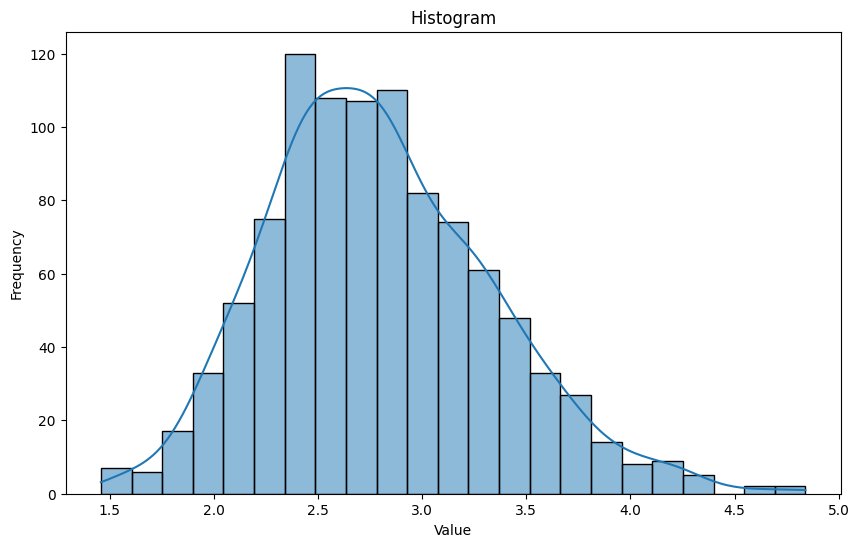

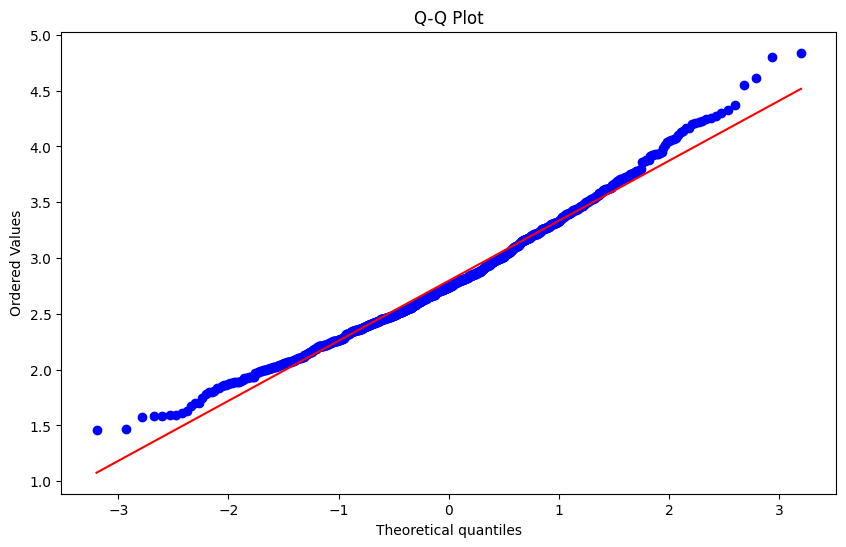

In [48]:
#@title Run this code to visualize the histogram and the Q-Q plot of the data.
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True) #This parameter stands for "Kernel Density Estimate."
#When set to True, it overlays a smoothed estimate of the data's distribution,
#providing a continuous curve representing the data's density.
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(data, dist="norm", plot=plt) #generate a probability plot,
#which is a graphical technique for assessing whether or not a dataset follows a given distribution,
plt.title('Q-Q Plot')
plt.show()


**Statistical Tests:** The primary object of statistical analysis is to find out whether an observed effect is genuine and is not due to chance. Hence, the analysis usually attaches a test of statistical significance.

Hypothesis Testing is a type of statistical analysis in which you put your assumptions about the observed effect to the test.

First step in such a test is to state the hypothesis.

**Null hypothesis (H0)**: we make the assumption that no difference exists between the two groups.<br>
 **Alternative hypothesis (H1)**: states that there is a difference between two groups.

Then the **appropriate (based on the data) test** must be decided and the relevant test statistic T is calculated.

A **significance level (α)** must be selected.Significance level is a probability threshold below which the null hypothesis will be rejected (the probability of rejecting the null hypothesis when it is true). Commonly we choose a level of 0.05 (5% risk of concluding that a difference exists when there is no actual difference).

Test output: **p-value**<br>
The p-value is the probability that a given result (or a more significant result) would occur under the null hypothesis.

*!!The p-value does not provide the probability that either the null hypothesis or its opposite is correct*


**Test of normality**
uses the hypothesis testing to determine whether the proposed data follow the normal distribution or not.

**H0 :** data is normally distributed<br>
**H1 :** data is not normally distributed

Thus, if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed. On the other hand, if the p value is greater than the chosen alpha level, then the null hypothesis (that the data came from a normally distributed population) can not be rejected.

In [49]:
from scipy.stats import shapiro, kstest, anderson

# Shapiro-Wilk Test
shapiro_test = shapiro(data)
print('Shapiro-Wilk Test:')
print(f'Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}')

# Kolmogorov-Smirnov Test
ks_test = kstest(data, 'norm')
print('\nKolmogorov-Smirnov Test:')
print(f'Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}')

# Anderson-Darling Test
ad_test = anderson(data, dist='norm')
print('\nAnderson-Darling Test:')
print(f'Statistic: {ad_test.statistic}')
for i, (cv, sig) in enumerate(zip(ad_test.critical_values, ad_test.significance_level)):
    print(f'Critical value: {cv}, Significance level: {sig}%')


Shapiro-Wilk Test:
Statistic: 0.9855873492821515, p-value: 2.3032972320317863e-08

Kolmogorov-Smirnov Test:
Statistic: 0.9500264430440344, p-value: 0.0

Anderson-Darling Test:
Statistic: 3.653774518246564
Critical value: 0.574, Significance level: 15.0%
Critical value: 0.653, Significance level: 10.0%
Critical value: 0.784, Significance level: 5.0%
Critical value: 0.914, Significance level: 2.5%
Critical value: 1.088, Significance level: 1.0%


---

<a name="plot"></a>

## **2. Plotting data**

Making informative visualizations (sometimes called plots) is one of the most important tasks in data analysis.

`matplotlib` is a plotting package designed for creating plots and figures suitable for publication.<br>
Over time, matplotlib has spawned a number of add-on toolkits for data visualization that use matplotlib for their underlying plotting. One of these is `seaborn`.

To output plots in the Jupyter notebook you can execute the following statement in a Jupyter notebook:

`%matplotlib inline`

With matplotlib, we use the following import convention.

In [50]:
import matplotlib.pyplot as plt

Let's try creating a simple plot.

In [74]:
#@title Run this to create a dataset.
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The `plot()` function is used to draw points (markers) in a diagram.
By default, the plot() function draws a line from point to point.

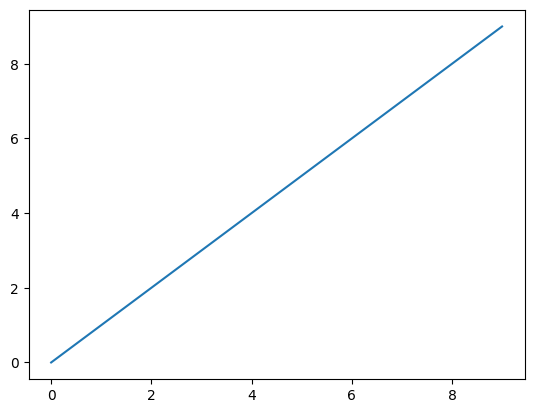

In [52]:
plt.plot(data)

---

<a name="fig"></a>

## **2.1 Figures and Subplots**

Plots in matplotlib reside within a 'Figure' object. You can create a new figure with `plt.figure`.

In [53]:
fig=plt.figure()

<Figure size 640x480 with 0 Axes>

`plt.figure` has a number of options; notably, `figsize` will guarantee the figure has a certain size and aspect ratio if saved to disk.

You can’t make a plot with a blank figure. You have to create one or more subplots using `add_subplot`.

In [54]:
ax1 = fig.add_subplot(1, 3, 1)

This means that the figure should be 1 × 3 (so up to three plots in total), and we’re selecting the first of three subplots (numbered from 1). We can create the next two subplots.

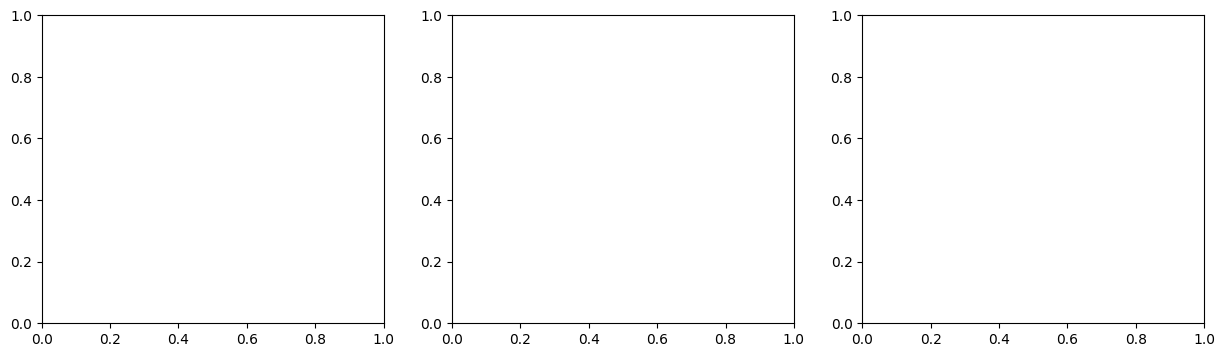

In [55]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

These plot axis objects have various methods that create different types of plots, and it is preferred to use the axis methods over the top-level plotting functions like `plt.plot`.

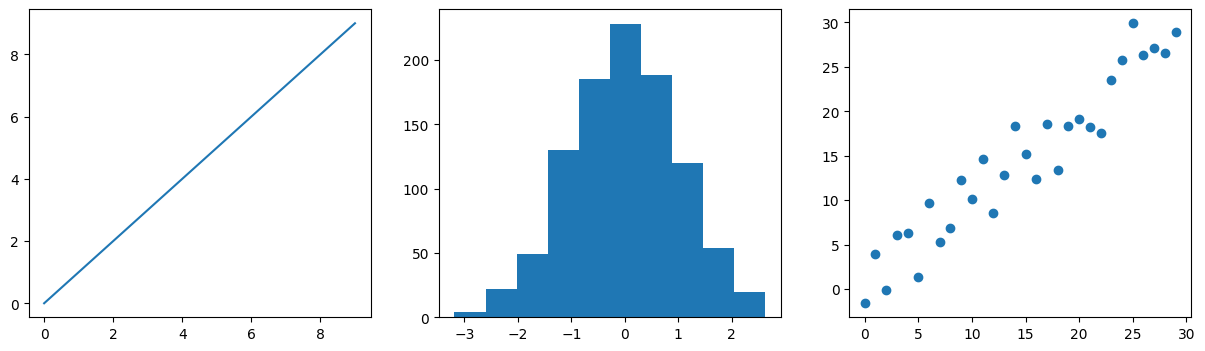

In [56]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.plot(np.arange(10))
ax2.hist(np.random.randn(1000))
ax3.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))

---

<a name="col"></a>

## **2.2 Colors, Markers, and Line Styles**

Matplotlib’s line `plot` function accepts arrays of x and y coordinates and optional color styling options.  

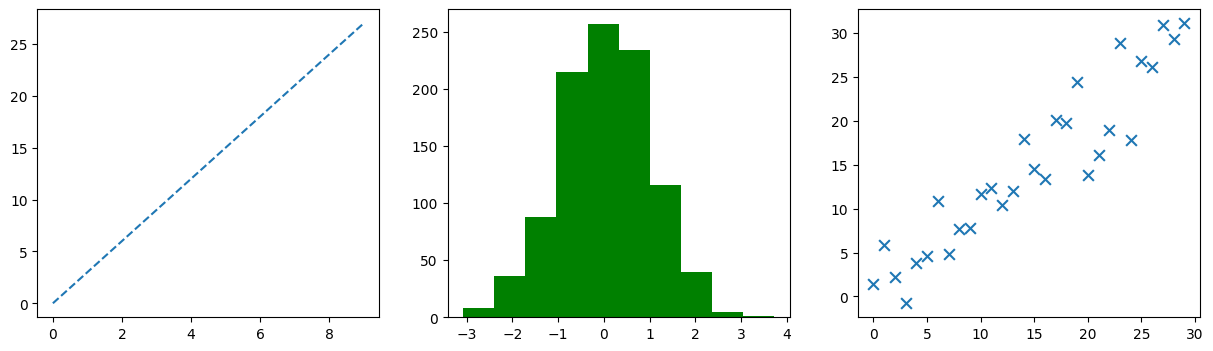

In [57]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

#Create arrays as input for ax1
x=np.arange(10)
y=3*x

ax1.plot(x,y,linestyle="dashed") #plot x versus y with dashed line
ax2.hist(np.random.randn(1000),color='green') #plot the histogram of the data in green
ax3.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30), marker="x", s=60 ) #plot each datapoint coordinates. Data points represented as x


You can find all available matplotlib colors [here](https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py).

You can find all available matplotlib linestyles [here](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html).

Line plots can additionally have markers to highlight the actual data points. Since matplotlib's plot function creates a continuous line plot, interpolating between points, it can occasionally be unclear where the points lie.

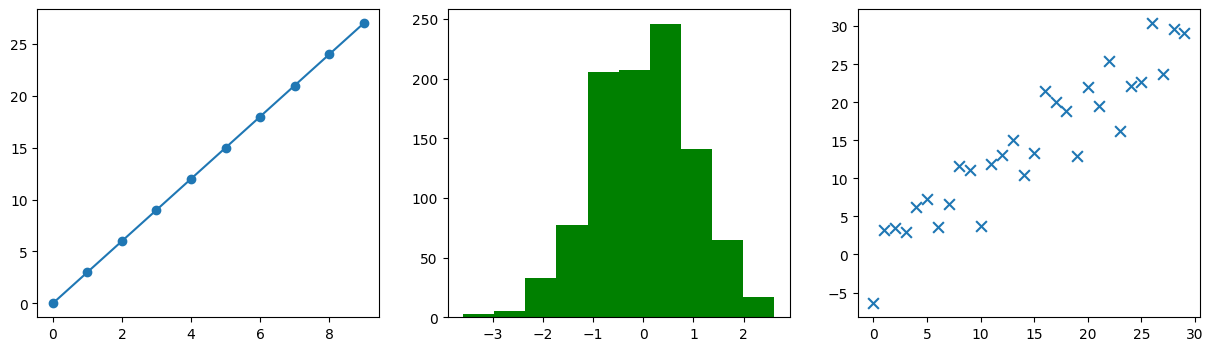

In [58]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.plot(x,y,marker="o")
ax2.hist(np.random.randn(1000),color='green')
ax3.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30), marker="x", s=60 )

You can find the available marker styles [here](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html).

---

<a name="ticks"></a>

## **2.3 Ticks, Labels, and Legends**

Most kinds of plot decorations can be accessed through methods on matplotlib axes objects. This includes methods like `xlim`, `xticks`, and `xticklabels`. These control the plot range, tick locations, and tick labels, respectively. They can be used in two ways:

- Called with no arguments returns the current parameter value (e.g., ax.xlim() returns the current x-axis plotting range)

- Called with parameters sets the parameter value (e.g., ax.xlim([0, 10]) sets the x-axis range to 0 to 10)

In [59]:
#@title Run this to create a new dataset of x and y arrays
np.random.seed(130)

# Let's set some parameters
theta = 1.7
n_samples = 50

# Draw x and then calculate y
x = 10 * np.random.rand(n_samples)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = theta * x + noise


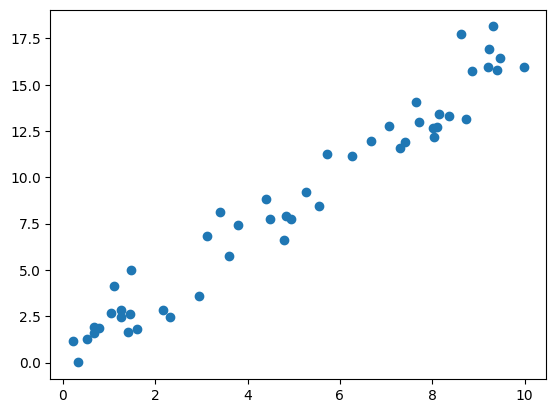

In [60]:
fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot

To change the x-axis ticks, it’s easiest to use `set_xticks` and `set_xticklabels`. The former instructs matplotlib where to place the ticks along the data range; by default these locations will also be the labels. But we can set any other values as the labels using `set_xticklabels`.

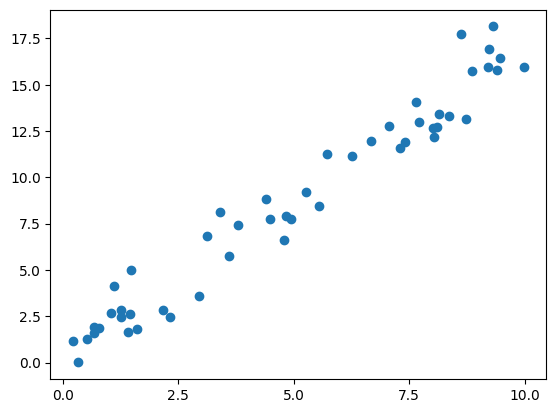

In [61]:
fig= plt.figure()
ax=fig.add_subplot()

ax.set_xticks([0, 2.5, 5, 7.50, 10])
ax.scatter(x, y)

Lastly, `set_xlabel` gives a name to the x-axis, and `set_title` is the subplot title.

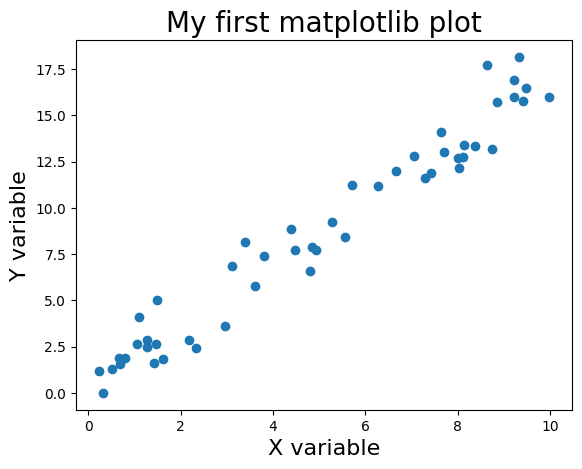

In [62]:
fig= plt.figure()
ax=fig.add_subplot()

ax.scatter(x, y)

xlabel=ax.set_xlabel("X variable",fontsize=16)
xlabel=ax.set_ylabel("Y variable",fontsize=16)
title=ax.set_title("My first matplotlib plot",fontsize=20)

Legends are another critical element for identifying plot elements. There are a couple of ways to add one. The easiest is to pass the `label` argument when adding each piece of the plot.
Once you’ve done this, you can call `ax.legend()` to automatically create a legend.

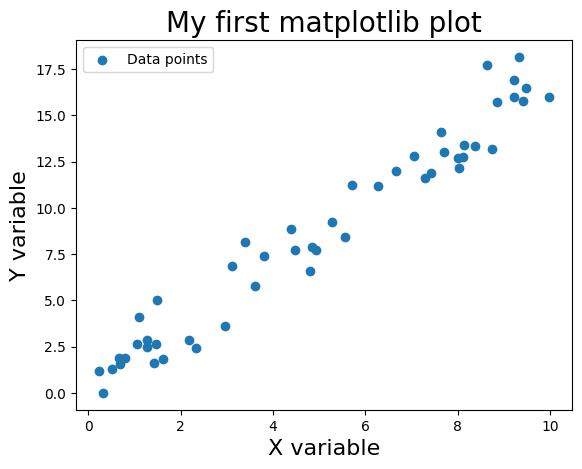

In [63]:
fig= plt.figure()
ax=fig.add_subplot()

ax.scatter(x, y, label='Data points')
ax.legend()

xlabel=ax.set_xlabel("X variable",fontsize=16)
xlabel=ax.set_ylabel("Y variable",fontsize=16)
title=ax.set_title("My first matplotlib plot",fontsize=20)

The `legend` method has several other choices for the location [`loc`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html) argument.

The `loc` legend option tells matplotlib where to place the plot. The default is "best", which tries to choose a location that is most out of the way.

Multiple plots can be included in the same subplot

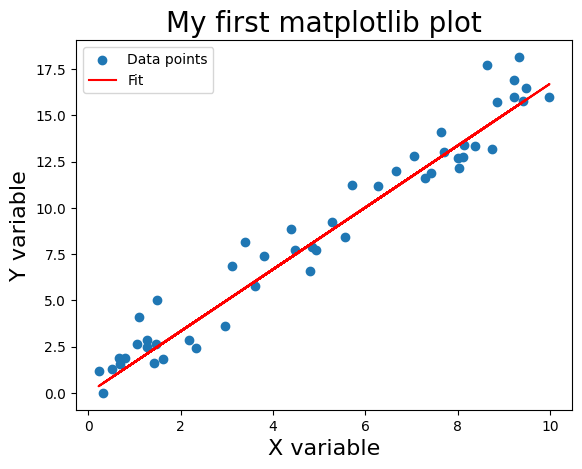

In [64]:
y1= 1.67* x #create new y array


fig= plt.figure()
ax=fig.add_subplot()

ax.scatter(x, y, label='Data points')
ax.plot(x, y1, color='r', label='Fit') #create a lineplot of a dataset consisting of the x and y1 arrays
ax.legend()

xlabel=ax.set_xlabel("X variable",fontsize=16)
xlabel=ax.set_ylabel("Y variable",fontsize=16)
title=ax.set_title("My first matplotlib plot",fontsize=20)



---

<a name="annot"></a>

## **2.4 Annotations and Drawing on a Subplot**

In addition to the standard plot types, you may wish to draw your own plot annotations, which could consist of text, arrows, or other shapes. You can add annotations and text using the `text`, `arrow`, and `annotate` functions. text draws text at given coordinates (x, y) on the plot with optional custom styling.

Now let's say we want to include in the plot the function of the lineplot.

Text(6, 9, 'y=1.67x')

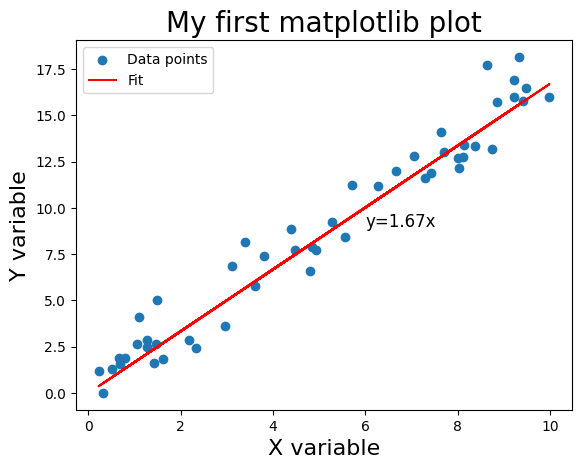

In [65]:
fig= plt.figure()
ax=fig.add_subplot()

ax.scatter(x, y, label='Data points')
ax.plot(x, y1, color='r', label='Fit')
ax.legend()

xlabel=ax.set_xlabel("X variable",fontsize=16)
xlabel=ax.set_ylabel("Y variable",fontsize=16)
title=ax.set_title("My first matplotlib plot",fontsize=20)

ax.text(6, 9,'y=1.67x',fontsize=12)

---

<a name="save"></a>

## **2.5 Saving Plots to File**

You can save the active figure to file using the figure object’s `savefig` instance method, defining the file path and the name, as well as the file type.

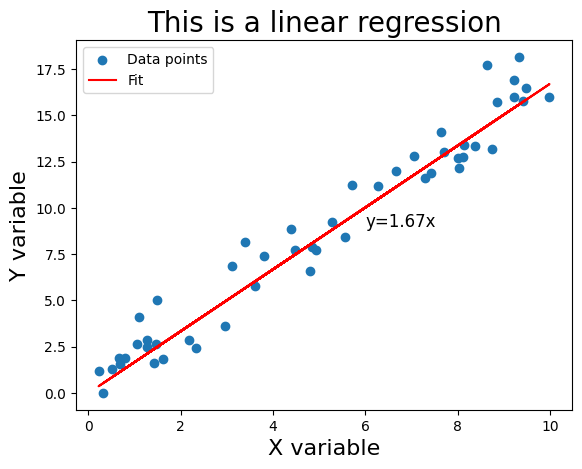

In [66]:
fig= plt.figure()
ax=fig.add_subplot()

ax.scatter(x, y, label='Data points')
ax.plot(x, y1, color='r', label='Fit')
ax.legend()

xlabel=ax.set_xlabel("X variable",fontsize=16)
xlabel=ax.set_ylabel("Y variable",fontsize=16)
title=ax.set_title("This is a linear regression",fontsize=20)

ax.text(6, 9,'y=1.67x',fontsize=12)
plt.savefig("Regression.png",facecolor='w',dpi=300)

#If using Jupyter notebooks outside of colab you need to specify the path within your local computer for where to save it
#plt.savefig("C:/Users/Artemis/Documents/TReND/CaMinA/Regression.png",facecolor='w',dpi=300)

**!!!Careful!!! If you try to save a file/plot with the same name in the same location, python will not notify you another file with the same name exists. It will just overwrite the older file.!!!**


---
<a name="selfstudy"></a>
# **3. Self Study: Pandas**


**pandas** is a powerful data analysis package. It makes data exploration and manipulation easy. It has several functions to read data from various sources.

A really useful data handling tool is the **Pandas DataFrame**. It is a 2-dimensional labeled data structure like any table with rows and columns. The size and values of the dataframe are mutable,i.e., can be modified. It is the most commonly used pandas object. Whether you create a dataframe from scratch or you import data from a file to it, you can easily explore and transform your data.

So let's start using pandas!


First you need to import the package. It is usually imported with the abbreviation pd.

To check out all the other possibilities during data handling you can have a look at the documentation  of the [`pandas.DataFrame`](#https://pandas.pydata.org/docs/reference/frame.html) module.

In [67]:
import pandas as pd

---

<a name="create"></a>

## **3.1 Creating dataframes**

You can also create dataframes using the `pandas.DataFrame()` function.
DataFrames can be created in multiple ways.

The syntax of creating dataframe is:

`pandas.DataFrame(data, index, columns)`

where,

**data**: It is a dataset from which dataframe is to be created. It can be list, dictionary, scalar value, series, ndarrays, etc.

**index**: It is optional, by default the index of the dataframe starts from 0 and ends at the last data value(n-1). It defines the row label explicitly.

**columns**: This parameter is used to provide column names in the dataframe. If the column name is not defined by default, it will take a value from 0 to n-1.

**Method #1: Creating  Dataframe from Lists**

In [68]:
data=[10,20,30,40,50,60]

age=pd.DataFrame(data,columns=['Our Ages'])

age

,Our Ages
0,10
1,20
2,30
3,40
4,50
5,60


**Method #2: Creating Pandas DataFrame from lists of lists**

In [69]:
data=[['tom',10],['nick',15],['juli',14],['kate']]

ages2=pd.DataFrame(data,columns=['NAme','Age'])

ages2

,NAme,Age
0,tom,10.0
1,nick,15.0
2,juli,14.0
3,kate,NaN


**Method #3: Creating DataFrame from dict of narray/lists**

To create DataFrame from dict of narray/list, all the narray must be of same length. If index is passed then the length index should be equal to the length of arrays. If no index is passed, then by default, index will be range(n) where n is the array length.

In [70]:
# initialize data of lists.
data = {'Name': ['Tom', 'nick', 'krish', 'jack'],
        'Age': [20, 21, 19, 18]}

# Create DataFrame
df = pd.DataFrame(data)

# Print the output.
df

,Name,Age
0,Tom,20
1,nick,21
2,krish,19
3,jack,18


**Method #4: Creating a DataFrame by proving index label explicitly**

In [71]:
# initialize data of lists.
data = {'Name': ['Tom', 'Jack', 'nick', 'juli'],
        'marks': [99, 98, 95, 90]}

# Creates pandas DataFrame.
df = pd.DataFrame(data, index=['rank1',
                               'rank2',
                               'rank3',
                               'rank4'])

# print the data
df

,Name,marks
rank1,Tom,99
rank2,Jack,98
rank3,nick,95
rank4,juli,90


---

<a name="read"></a>

## **3.2 Reading data**

### Tip

Before starting the analysis of a dataset create a folder that will serve as import/export location for the particular analysis. It will make your life easier.

You can import a file by using the function [`pd.read_[format]()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). <br>
The changes/processing you make on the data in the notebook are not saved in the original file.

**pandas** can read data stored in any of the popular formats - CSV, TXT, XLS/XLSX (Excel), sas7bdat (SAS), Stata, Rdata (R) etc.

Let's import the data stored in *dataCon.csv*. To import a file you need to tell python where it is located (file path).

In [72]:
from google.colab import files
uploaded = files.upload()
#Allows Colab to upload file from local pc
#Click on the "Choose Files" button that appears, select the dataCon.csv file from your local machine,
#and then click on "Open".

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
df_Con=pd.read_csv("dataCon.csv")
df_Con

What do you notice?

If your raw data file has no headers (column names) you need to tell python that by adding `header = None` after you specify the file path.

In [ ]:
from google.colab import files
uploaded = files.upload() #open the dataCon_noheader.csv file

In [ ]:
df_Con=pd.read_csv("dataCon_noheader.csv",header=None)
df_Con

If there are no headers you can include column names by using `names=["here","comes","the","name"]`.

In [ ]:
df_Con=pd.read_csv("dataCon_noheader.csv",names=["Experiment day","Con1","Con2","Con3","Con4"])

df_Con

When processing very large files or figuring out the right set of arguments to correctly process a large file, you may want to read only a small piece of a file or iterate through smaller chunks of the file.

By specifying `nrows=` and `usecols=[]`, you can fetch specified number of rows and columns.

In [ ]:
pd.read_csv("dataCon.csv",nrows=3,usecols=[0,1])

Suppose you want to skip some rows and want to read data from a certain row on. You can do this with `skiprows=[number or rows to be skipped]`

In [ ]:
pd.read_csv("dataCon.csv",skiprows=[2,5,7])

You can print the column names along with their Data types with `.dtypes`. This is really useful when you are handling big data files.

In [ ]:
df_Con=pd.read_csv("dataCon.csv")
df_Con.dtypes

Use `.head()` and `.tail()` to view the top and bottom rows of the frame respectively.

In [ ]:
df_Con.tail()

Display the row and column names with `.index` and `.columns` respectively.

In [ ]:
df_Con.index

In [ ]:
df_Con.columns

You can look at a quick statistic summary of your data with `.describe()`


In [ ]:
df_Con.describe()

You can break down your data based on labels with `.loc[]` by specifying the number of rows and columns it should display.

In [ ]:
Con1=df_Con.loc[:,"Con1"]
Con1

To flip your data you can use `.transpose()`. This is important as some analysis methods might need the data in the transposed format.

In [ ]:
Con_tran=df_Con.transpose()
Con_tran

---

<a name="clean"></a>

## **3.3 Data cleaning**

During the course of doing data analysis and modeling, a significant amount of time is spent on data preparation: loading, cleaning, transforming, and rearranging. Such tasks are often reported to take up 80% or more of an analyst's time. Sometimes the way that data is stored in files or databases is not in the right format for a particular task.

**pandas**, along with the built-in Python language features, provides you with a high-level, flexible, and fast set of tools to enable you to manipulate data into the right form.

<a name="miss"></a>

### Missing data

Missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.

When using **pandas** all of the descriptive statistics on objects exclude missing data by default.

For data with float64 dtype, **pandas** uses the floating-point value NaN (Not a Number) to represent missing data.
We call this a sentinel value: when present, it indicates a missing (or null) value

In [ ]:
df_Con

Missing data reduces the representativeness of the sample and can therefore distort inferences about the population.Generally speaking, there are three main approaches to handle missing data:

- Imputation—where values are filled in the place of missing data
- Omission—where samples with invalid data are discarded from further analysis  
- Analysis—by directly applying methods unaffected by the missing values

`.dropna()` can be helpful to filter out missing data. On a dataframe, it returns the dataframe with only the nonnull data and index values.

In [ ]:
df_Con.dropna()

By passing the argument `how="all"` you can drop only rows that are all NaN.

In [ ]:
df_Con.dropna(how="all")

To drop columns in the same way, you can pass `axis="columns"`.

In [ ]:
#Creates an extra column with all values as NaN
df_Con['Con5']=np.nan
df_Con

In [ ]:
df_Con=df_Con.dropna(axis="columns",how='all')
df_Con

Suppose you want to keep only rows containing at most a certain number of missing observations. You can indicate this with the `thresh` argument.

In [ ]:
df_Con.dropna(thresh=4)

Rather than filtering out missing data (and potentially discarding other data along with it), you may want to fill in the “holes” in any number of ways. To do so you can use the function `.fillna()` either by passing a constant as an argument or by using the median or mean statistics.

In [ ]:
df_Con.fillna(0)

<a name="dup"></a>

### Duplicates

Duplicate rows may be found in a DataFrame for any number of reasons.

The DataFrame method `.duplicated()` returns a Boolean Series indicating whether each row is a duplicate (its column values are exactly equal to those in an earlier row) or not

In [ ]:
#@title Run this to create a dataset
data = pd.DataFrame({"k1": ["one", "two",] * 3 + ["two"],"k2": [1, 1, 2, 3, 3, 4, 4,]})
data

`.drop_duplicates()` returns a DataFrame with rows where the duplicated array filtered out.

In [ ]:
data.duplicated()#identifies duplicates

In [ ]:
data.drop_duplicates(keep='last')

`.duplicated()` and `.drop_duplicates()` by default keep the first observed value combination. Passing `keep="last"` will return the last one.

<a name="replace"></a>

### Replacing data

pandas `.map()` function is used to substitute each value in a Series with another value, that may be derived from a function, a dict or a Series. Since DataFrame columns are series, you can use `.map()` to update the column and assign it back to the DataFrame.

In [ ]:
data=pd.DataFrame({"x":[34,54,23,45,76]})
data

In [ ]:
def log(x):
    return np.log(x)

data["x"].map(log)

Filling in missing data with the `fillna` method is a special case of more general value replacement. As you've already seen, `map` can be used to modify a subset of values in an object, but `.replace()` provides a simpler and more flexible way to do so.

In [ ]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

The -999 values might be sentinel values for missing data. To replace these with NA values, we can use `.replace()`, producing a new Series.

In [ ]:
data.replace(-999, np.nan)


---

<a name="wrang"></a>

## **3.4 Data Wrangling**

Data may be spread across a number of files or databases, or be arranged in a form that is not convenient to analyze.

Data contained in pandas objects can be combined in a number of ways:

**`pandas.merge` :**
Connect rows in DataFrames based on one or more keys.

**`pandas.concat`:**
Concatenate or "stack" objects together along an axis.

**`combine_first`:**
Splice together overlapping data to fill in missing values in one object with values from another.

Let's see some examples.<br>
**`pandas.merge`**

In [ ]:
#Creates two dataframes
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "a", "b"],"data1": pd.Series(range(7), dtype="Int64")})
df2 = pd.DataFrame({"key": ["a", "b", "d"],"data2": pd.Series(range(3), dtype="Int64")})

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.merge(df1, df2)

Note that I didn’t specify which column to join on. If that information is not specified, `pandas.merge` uses the overlapping column names as the keys. It’s a good practice to specify explicitly, though:

In [ ]:
pd.merge(df1, df2, on="key")

You may notice that the "c" and "d" values and associated data are missing from the result. By default, `pandas.merge` does an "inner" join; the keys in the result are the intersection, or the common set found in both tables.

In [ ]:
pd.merge(df1, df2, how="outer")

**`pandas.concat`**

In [ ]:
#Creates three datasets
s1 = pd.Series([0, 1], index=["a", "b"], dtype="Int64")
s2 = pd.Series([2, 3, 4], index=["c", "d", "e"], dtype="Int64")
s3 = pd.Series([5, 6], index=["f", "g"], dtype="Int64")

In [ ]:
s1

In [ ]:
s2

In [ ]:
s3

In [ ]:
pd.concat([s1,s2,s3])

By default, `pandas.concat` works along axis="index", producing another Series. If you pass axis="columns", the result will instead be a DataFrame:

In [ ]:
pd.concat([s1, s2, s3], axis="columns")

**`combine.first`**
There is another data combination situation that can’t be expressed as either a merge or concatenation operation. You may have two datasets with indexes that overlap in full or in part.

In [ ]:
#Creates two datasets
a = pd.Series([np.nan, 2.5, 0.0, 3.5, 4.5, np.nan],index=["f", "e", "d", "c", "b", "a"])
b = pd.Series([0., np.nan, 2., np.nan, np.nan, 5.],index=["a", "b", "c", "d", "e", "f"])

In [ ]:
a

In [ ]:
b

In [ ]:
a.combine_first(b)

With DataFrames,`combine_first` does the same thing column by column, so you can think of it as “patching” missing data in the calling object with data from the object you pass:

In [ ]:
df1 = pd.DataFrame({"a": [1., np.nan, 5., np.nan],"b": [np.nan, 2., np.nan, 6.],"c": range(2, 18, 4)})
df2 = pd.DataFrame({"a": [5., 4., np.nan, 3., 7.],"b": [np.nan, 3., 4., 6., 8.]})

In [ ]:
df1

In [ ]:
df2

In [ ]:
df1.combine_first(df2)

---

<a name="expo"></a>

## **3.5 Exporting data**

You can export your data to a file by using the function [`pd.DataFrame.to_[format]()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html). <br>


pandas can store data in any of the popular formats - CSV, TXT, XLS/XLSX (Excel), sas7bdat (SAS), Stata, Rdata (R) etc.

Let's create the complete dataset by merging the two files "dataCon" and "dataMut".

In [ ]:
from google.colab import files
uploaded = files.upload() #open the dataMut.csv file

In [ ]:
import pandas as pd

df_Con=pd.read_csv("dataCon.csv")
df_Mut=pd.read_csv("dataMut.csv")

df_whole=pd.merge(df_Con,df_Mut, on="Experiment day")
df_whole

Let's export the dataframe we created above as a .csv file.

In [ ]:
df_whole.to_csv("whole_data.csv")

---
# About the author (feel free to contact)

## Artemis Koumoundourou
- Post-doctoral researcher at the [VIB-KU Leuven Center for Brain & Disease Research](https://cbd.sites.vib.be/en#/) (VIB-KU Leuven CBD) in Leuven, Belgium. I study how the molecular composition of synapses drives circuit connectivity and specification at the [Lab of Synapse Biology](https://dewitlab.sites.vib.be/en).
- Executive Director at [TReND in Africa](https://trendinafrica.org/).
- Links:
[X](https://x.com/artemiskoum), [Linkedin](https://www.linkedin.com/in/artemis-koumoundourou-6b77a284/), [ORCID](https://orcid.org/0000-0002-8917-5717)
- Feel free to contact me: artemis@trendinafrica.org
